In [1]:
import mne
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:\\Users\\ning\\Downloads\\training set')

In [18]:
raw = mne.io.read_raw_brainvision('suj10_d2_nap.vhdr',preload=True)
raw.filter(1,50,l_trans_bandwidth=0.5,)

Extracting parameters from suj10_d2_nap.vhdr...
Setting channel info structure...
Reading 0 ... 3703799  =      0.000 ...  3703.799 secs...
Band-pass filtering from 1 - 50 Hz


<RawBrainVision  |  suj10_d2_nap.eeg, n_channels x n_times : 65 x 3703800 (3703.8 sec)>

In [19]:
print(raw.ch_names)
raw.set_channel_types({'LOc':'eog','ROc':'eog'})
picks=mne.pick_types(raw.info,meg=False,eeg=True,eog=False,stim=False)
noise_cov=mne.compute_raw_covariance(raw,picks=picks)
raw.notch_filter(np.arange(60,241,60), picks=picks)

[u'Fp1', u'Fz', u'F3', u'F7', u'FT9', u'FC5', u'FC1', u'C3', u'T7', u'CP5', u'CP1', u'Pz', u'P3', u'P7', u'O1', u'Oz', u'O2', u'P4', u'P8', u'TP10', u'CP6', u'CP2', u'Cz', u'C4', u'T8', u'FT10', u'FC6', u'FC2', u'F4', u'F8', u'Fp2', u'AF7', u'AF3', u'AFz', u'F1', u'F5', u'FT7', u'FC3', u'FCz', u'C1', u'C5', u'TP7', u'CP3', u'P1', u'P5', u'PO7', u'PO3', u'POz', u'PO4', u'PO8', u'P6', u'P2', u'CPz', u'CP4', u'TP8', u'C6', u'C2', u'FC4', u'FT8', u'F6', u'F2', u'LOc', u'ROc', u'Aux1', 'STI 014']
Using up to 18518 segments
Number of samples used : 3703600
[done]


<RawBrainVision  |  suj10_d2_nap.eeg, n_channels x n_times : 65 x 3703800 (3703.8 sec)>

EOG channel index for this subject is: [61 62]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Now detecting blinks and generating corresponding events
Number of EOG events detected : 4


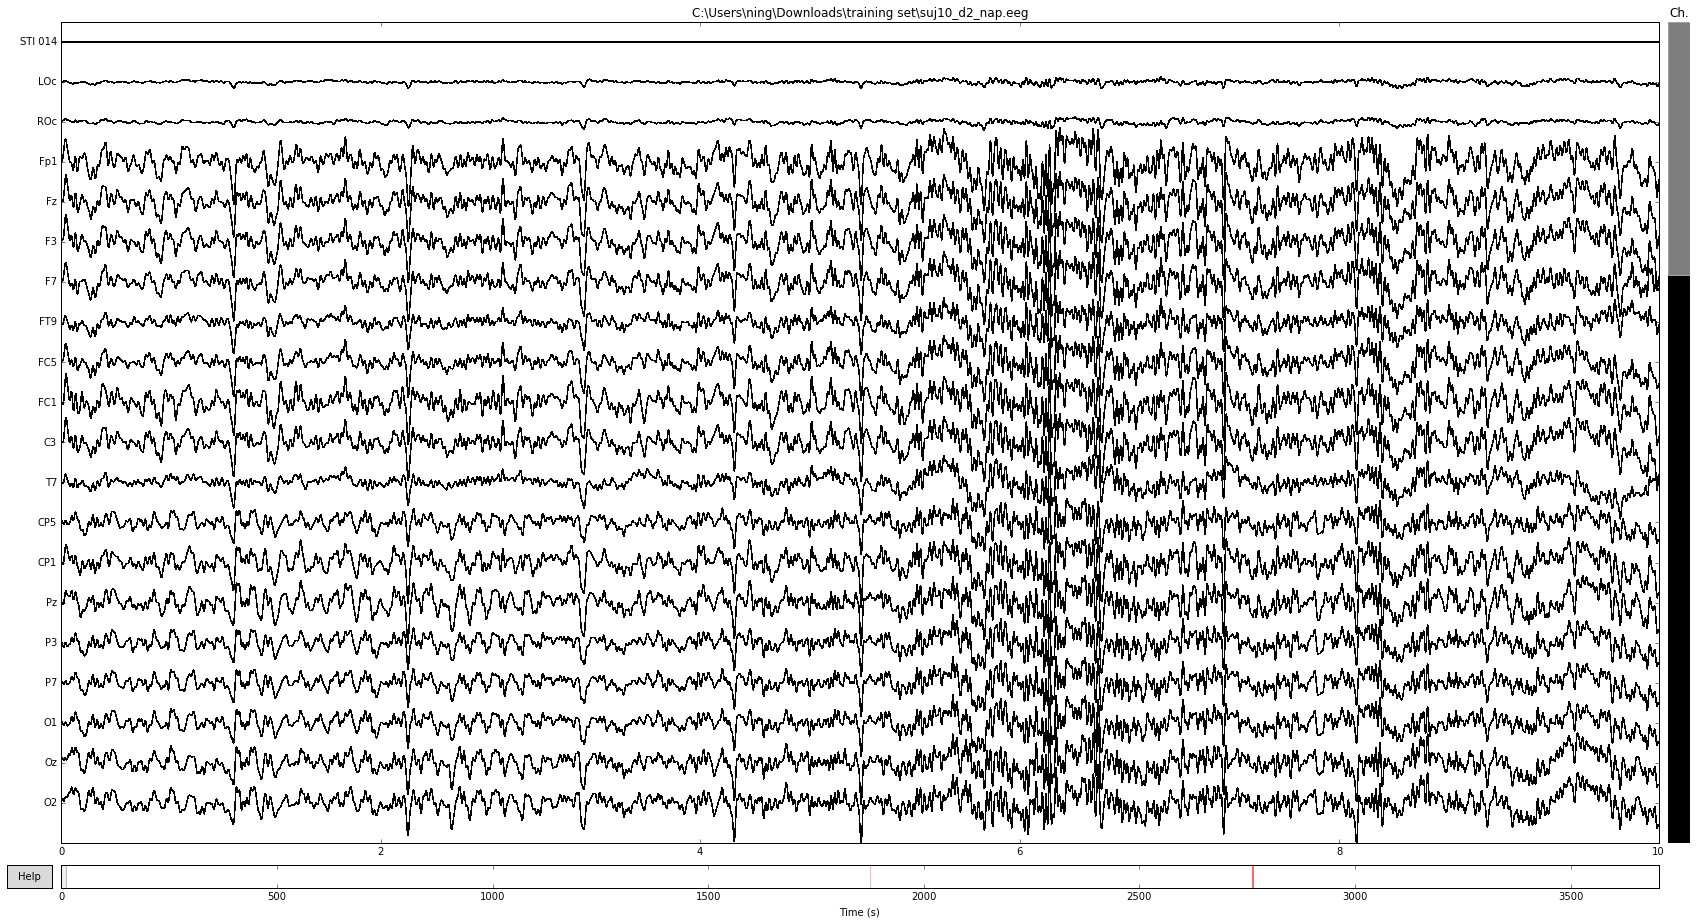

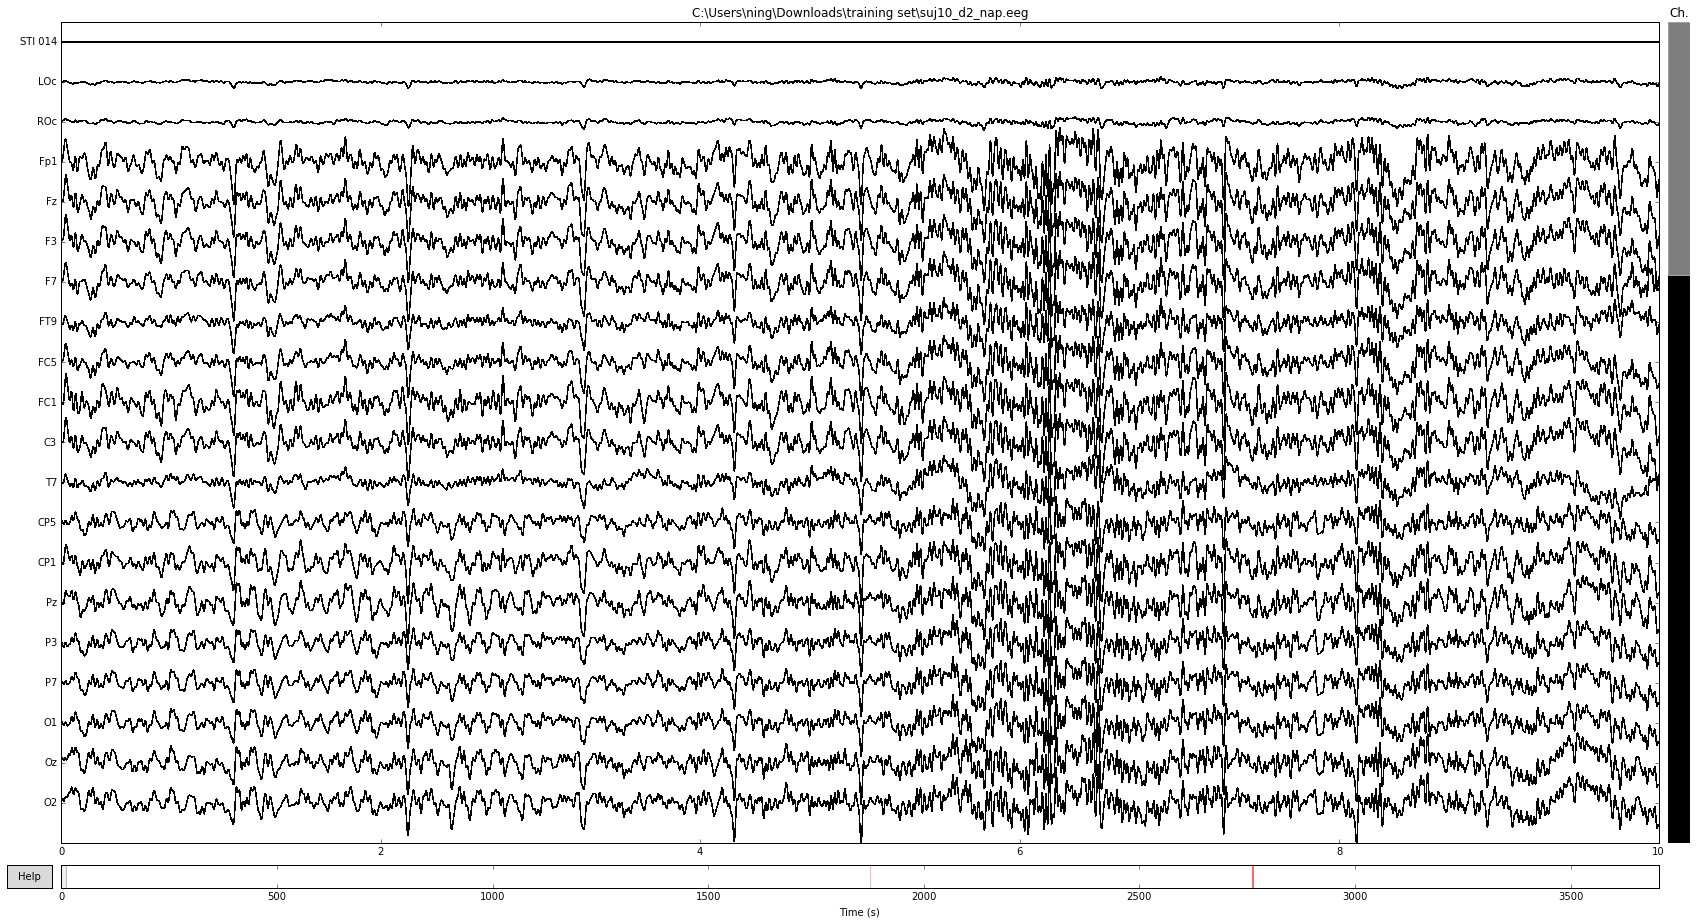

In [20]:
eog_events = mne.preprocessing.find_eog_events(raw,l_freq=1,h_freq=50,)
n_blinks = len(eog_events)
# Center to cover the whole blink with full duration of 0.5s:
onset = eog_events[:, 0] / raw.info['sfreq'] - 0.25
duration = np.repeat(0.5, n_blinks)
raw.annotations = mne.Annotations(onset, duration, ['bad blink'] * n_blinks,
                                  orig_time=raw.info['meas_date'])
raw.plot(events=eog_events)  # To see the annotated segments.

In [21]:
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs, create_ecg_epochs

In [22]:
picks_eeg = mne.pick_types(raw.info, meg=True, eeg=False, eog=False,
                           stim=False, exclude='bads')

In [23]:
n_components = .95  # if float, select n_components by explained variance of PCA
method = 'extended-infomax'  # for comparison with EEGLAB try "extended-infomax" here
decim = 3  # we need sufficient statistics, not all time points -> saves time

# we will also set state of the random number generator - ICA is a
# non-deterministic algorithm, but we want to have the same decomposition
# and the same order of components each time this tutorial is run
random_state = 23
n_iter = 1000

In [24]:
reject = dict(eeg=80e-6)
ica=mne.preprocessing.ICA.fit(raw, picks=picks_eeg, decim=decim, reject=reject,method=method,max_iter=n_iter,noise_cov=noise_cov)

TypeError: unbound method fit() must be called with ICA instance as first argument (got RawBrainVision instance instead)